<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/SM_05_Medidas_correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medidas de Correlação com Python

#### Objetivos:
- Entender como calcular correlações entre variáveis.
- Aprender a usar o **Coeficiente de Correlação de Pearson** (para variáveis normalmente distribuídas).
- Explorar métodos não paramétricos como **Spearman** e **Kendall** (para variáveis que não seguem uma distribuição normal).
- Fazer uso de gráficos de correlação para melhor visualização dos dados.

#### Dataset
Vamos usar o dataset **`tips`** da biblioteca `seaborn`, que contém dados sobre gorjetas em um restaurante. Esse dataset é ótimo para explorar a relação entre variáveis como o total da conta e o valor da gorjeta.

### 1. Importando Bibliotecas e Carregando o Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Carregando o dataset tips

In [ ]:
df = sns.load_dataset('tips')

#### Exibindo as primeiras linhas do dataset

In [ ]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 2. Correlação de Pearson

#### 2.1 O que é o Coeficiente de Correlação de Pearson?
O **Coeficiente de Correlação de Pearson** mede a **força** e a **direção** da relação linear entre duas variáveis quantitativas. Ele assume que as variáveis têm uma distribuição normal.

- **Quando usar**: Pearson é utilizado quando as variáveis têm uma relação linear e ambas seguem uma **distribuição normal**.

Onde \( r \) varia entre -1 e 1:
  - \( r = 1 \): Correlação positiva perfeita
  - \( r = -1 \): Correlação negativa perfeita
  - \( r = 0 \): Sem correlação linear

#### 2.2 Cálculo de Pearson
Vamos calcular a correlação de Pearson entre `total_bill` (valor total da conta) e `tip` (gorjeta).

#### Calculando a correlação de Pearson entre 'total_bill' e 'tip'

In [ ]:
pearson_corr = df['total_bill'].corr(df['tip'], method='pearson')
print("Correlação de Pearson entre 'total_bill' e 'tip':", pearson_corr)

Correlação de Pearson entre 'total_bill' e 'tip': 0.6757341092113646


### 3. Métodos Não Paramétricos: Spearman e Kendall

#### 3.1 Correlação de Spearman
O **Coeficiente de Spearman** mede a relação **monotônica** entre duas variáveis, o que significa que, à medida que uma variável aumenta, a outra também aumenta ou diminui, mas não necessariamente de forma linear.

- **Quando usar**: Use Spearman quando os dados não forem normalmente distribuídos ou se a relação entre as variáveis for **monotônica** (não linear).
- Baseia-se no ranking das variáveis.


#### 3.2 Cálculo de Spearman

#### Calculando a correlação de Spearman entre 'total_bill' e 'tip'

In [ ]:
spearman_corr = df['total_bill'].corr(df['tip'], method='spearman')
print("Correlação de Spearman entre 'total_bill' e 'tip':", spearman_corr)

Correlação de Spearman entre 'total_bill' e 'tip': 0.6789681219001009


#### 3.3 Correlação de Kendall
O **Coeficiente de Kendall** é outra medida não paramétrica que mede a associação entre duas variáveis. Ele leva em consideração a concordância entre pares de observações.

- **Quando usar**: Utilize Kendall quando o número de dados é pequeno, ou quando há muitos empates nos dados.
- Baseia-se na concordância e discordância de pares ordenados.


#### 3.4 Cálculo de Kendall

#### Calculando a correlação de Kendall entre 'total_bill' e 'tip'

In [ ]:
kendall_corr = df['total_bill'].corr(df['tip'], method='kendall')
print("Correlação de Kendall entre 'total_bill' e 'tip':", kendall_corr)

Correlação de Kendall entre 'total_bill' e 'tip': 0.517180972142381


### 4. Exibindo a Matriz de Correlação

Vamos exibir uma **matriz de correlação** entre todas as variáveis numéricas do dataset, usando o método de Pearson.

In [ ]:
# Criando uma matriz de correlação com Pearson
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr(method='pearson')
print("Matriz de correlação (Pearson):\n", corr_matrix)

Matriz de correlação (Pearson):
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


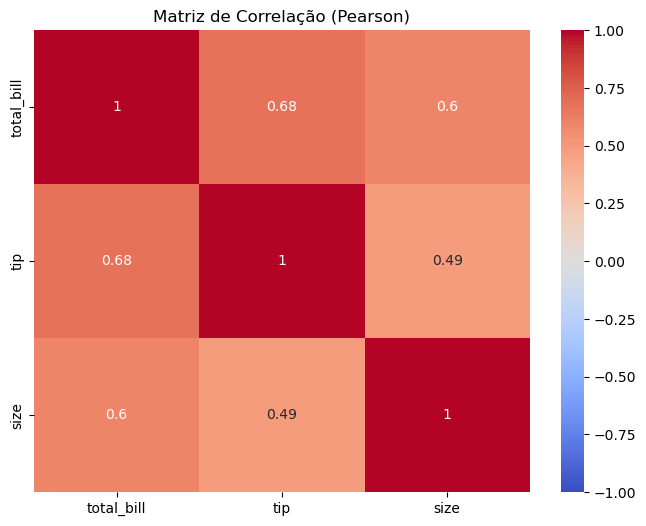

In [ ]:
# Plotando a matriz de correlação com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação (Pearson)')
plt.show()

### 5. Comparando os Métodos
- **Pearson**: Usado quando as variáveis são normalmente distribuídas e têm uma relação linear.
- **Spearman**: Adequado quando as variáveis têm uma relação monotônica, mas não necessariamente linear, ou quando os dados não seguem uma distribuição normal.
- **Kendall**: Preferido em datasets pequenos ou com muitos empates, fornecendo uma medida mais robusta em alguns casos.
